In [13]:
import csv
from statistics import median,mean
from matplotlib import pyplot as plt
import matplotlib
import squarify

khach_HCM=0
khach_HN=0
khach_DN=0
khach_nam=0
khach_nu=0 
Quantity_HaB=0
Quantity_E=0
Quantity_HaL=0
Quantity_SaT=0
Quantity_FaB=0
Quantity_F=0
count=0
list_total=[]
list_total_nam=[]
list_total_nu=[]
list_total_hcm=[]
list_total_hn=[]
list_total_dn=[]

list_rating=[]
list_rating_nam=[]
list_rating_nu=[]
list_rating_hcm=[]
list_rating_hn=[]
list_rating_dn=[]

tansuat_gioitinh=[]
tanso_donhang=[]
tansuat_donhang=[]
tanso_donhang=[]

with open ('data\sale_data_vn.csv',"r",encoding="utf8") as input_file:
    reader=csv.reader(input_file)
    next(reader) #skip the header
    for row in reader:
        count+=1
        list_total.append(float(row[10]))
        list_rating.append(float(row[14]))
        for i in row:
            if i=="TP HCM":
                khach_HCM+=1
                list_total_hcm.append(float(row[10]))
                list_rating_hcm.append(float(row[14]))
            elif i=="Đà Nẵng":
                khach_DN+=1
                list_total_dn.append(float(row[10]))
                list_rating_dn.append(float(row[14]))
            elif i=="Hà Nội":
                khach_HN+=1
                list_total_hn.append(float(row[10]))
                list_rating_hn.append(float(row[14]))
            if i=="Nam":
                khach_nam+=1
                list_total_nam.append(float(row[10]))
                list_rating_nam.append(float(row[14]))
            elif i=="Nữ":
                khach_nu+=1
                list_total_nu.append(float(row[10]))
                list_rating_nu.append(float(row[14]))
            if i == "Health and beauty":
                Quantity_HaB+=1
            elif i == "Electronic accessories":
                Quantity_E+=1
            elif i == "Home and lifestyle":
                Quantity_HaL+=1
            elif i == "Sports and travel":
                Quantity_SaT+=1
            elif i == "Food and beverages":
                Quantity_FaB+=1
            elif i == "Fashion accessories":
                Quantity_F+=1


## 1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv': 

### a. Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo 
+ Địa phương (HN, SG, ĐN)
+ Giới tính

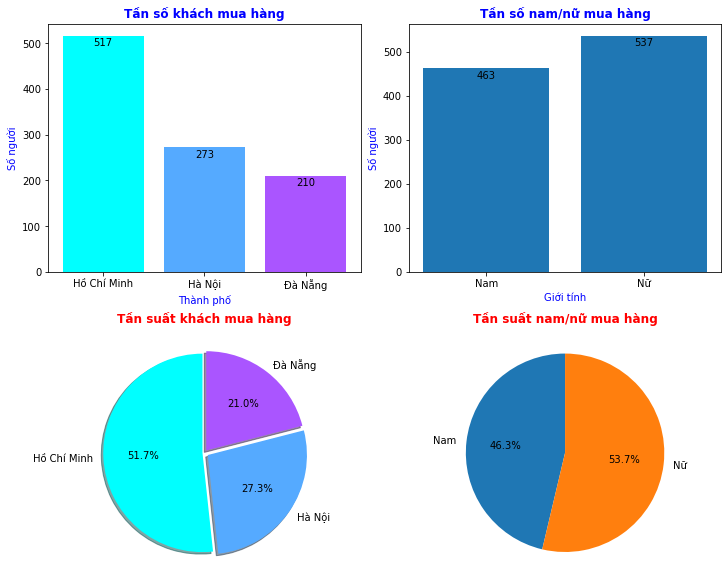

In [18]:
# Manually specifying colors from a colormap
color_map = plt.cm.get_cmap('cool')

fig,axes=plt.subplots(2,2,figsize=(10,8),constrained_layout=True)

tansuat_donhang=[khach_HCM,khach_HN,khach_DN]
colors = [color_map(i / len(tansuat_donhang)) for i in range(len(tansuat_donhang))]
tanso_donhang=[khach_HCM/count*100,khach_HN/count*100,khach_DN/count*100]
location=["Hồ Chí Minh","Hà Nội","Đà Nẵng"]

axes[0][0].bar(location,tansuat_donhang,color=colors)
axes[0][0].set_title("Tần số khách mua hàng",color='b',weight='bold')
axes[0][0].set_ylabel('Số người',color='b')
axes[0][0].set_xlabel('Thành phố',color='b')
axes[0][0].bar_label(container = axes[0][0].containers[0], padding=-12)


tanso_gioitinh=[khach_nam,khach_nu]
tansuat_gioitinh=[khach_nam/count,khach_nu/count]
axes[0][1].bar(["Nam","Nữ"],tanso_gioitinh)
axes[0][1].set_title("Tần số nam/nữ mua hàng",color='b',weight='bold')
axes[0][1].set_ylabel('Số người',color='b')
axes[0][1].set_xlabel('Giới tính',color='b')
axes[0][1].bar_label(container = axes[0][1].containers[0], padding=-12)

explode = (0.02, 0.04, 0.03)
axes[1][0].pie(tansuat_donhang,labels=location,autopct='%1.1f%%',
               explode=explode,startangle=90,shadow=True, colors=colors)
axes[1][0].set_title("Tần suất khách mua hàng",color='r',weight='bold')

axes[1][1].pie(tansuat_gioitinh,labels=["Nam","Nữ"],autopct='%1.1f%%',startangle=90)
axes[1][1].set_title("Tần suất nam/nữ mua hàng",color='r',weight='bold')

# plt.tight_layout()
# plt.savefig("bai1a_bai2.2.png",dpi=100)
plt.show()

* => Số khách hàng đặt đơn từ TP HCM chiếm số lượng lớn nhất, gần bằng số đơn hai thành phố kia cộng lại
* => Dù là nam hay nữ thì có vẻ ai cũng có nhu cầu chốt đơn gần như nhau, nhưng nữ vẫn có vẻ nhỉnh hơn xíu

#### b.Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating 
+ Phân bố chung
+ Theo giới tính, theo địa phương
#### c. Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

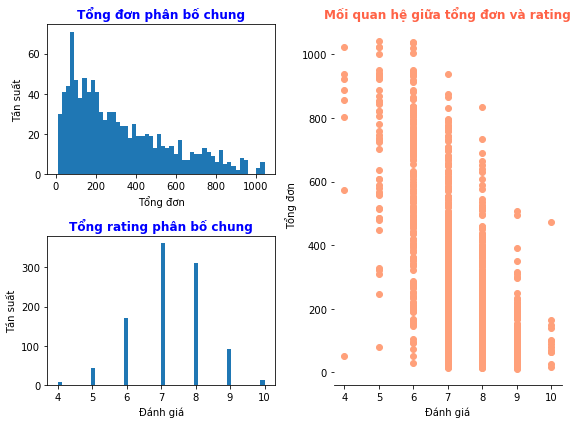

In [23]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax1.hist(list_total,bins=50)
ax1.set_title("Tổng đơn phân bố chung",color='b',weight='bold')
ax1.set_xlabel("Tổng đơn")
ax1.set_ylabel("Tần suất")

ax2=fig.add_subplot(2,2,3)
ax2.hist(list_rating,bins=50)
ax2.set_title("Tổng rating phân bố chung",color='b',weight='bold')
ax2.set_xlabel("Đánh giá")
ax2.set_ylabel("Tần suất")

ax3=fig.add_subplot(1,2,2)
ax3.scatter(list_rating,list_total,color='lightsalmon')
ax3.set_title("Mối quan hệ giữa tổng đơn và rating",color='tomato',weight='bold')
ax3.set_xlabel("Đánh giá")
ax3.set_ylabel("Tổng đơn")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.tight_layout()
plt.savefig("test_image.png",dpi=150)
plt.show()

+ => Người dùng có xu hướng chi tiêu khoảng từ 300 nghìn VND đổi lại cho các đơn hàng của mình.
+ => Các rating trong khoảng [6,8] chiếm ưu thế
+ => Đa phần các đơn 9.10 sao đều từ 300k đổ lại, hàng giá rẻ chưa chắc đã không tốt

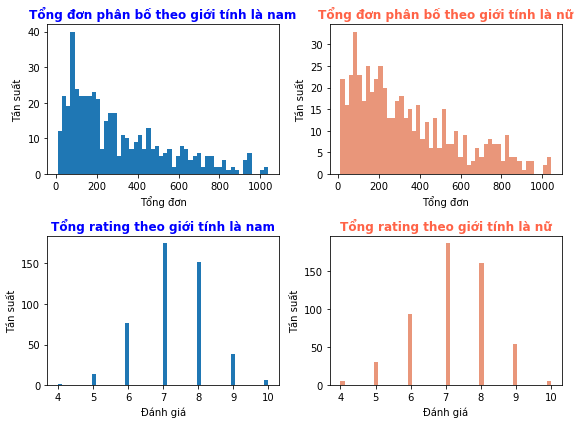

In [25]:
# bai 1b theo gioi tinh --------------------------------------------------------------------------
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax1.hist(list_total_nam,bins=50)
ax1.set_title("Tổng đơn phân bố theo giới tính là nam",color='b',weight='bold')
ax1.set_xlabel('Tổng đơn')
ax1.set_ylabel('Tần suất')

ax2=fig.add_subplot(2,2,2)
ax2.hist(list_total_nu,bins=50,color='darksalmon')
ax2.set_title("Tổng đơn phân bố theo giới tính là nữ",color='tomato',weight='bold')
ax2.set_xlabel('Tổng đơn')
ax2.set_ylabel('Tần suất')

ax3=fig.add_subplot(2,2,3)
ax3.hist(list_rating_nam,bins=50)
ax3.set_title("Tổng rating theo giới tính là nam",color='b',weight='bold')
ax3.set_xlabel('Đánh giá')
ax3.set_ylabel('Tần suất')

ax4=fig.add_subplot(2,2,4)
ax4.hist(list_rating_nu,bins=50,color='darksalmon')
ax4.set_title("Tổng rating theo giới tính là nữ",color='tomato',weight='bold')
ax4.set_xlabel('Đánh giá')
ax4.set_ylabel('Tần suất')


figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.tight_layout()
# plt.savefig("bai1b_theogioitinh.png",dpi=150)
plt.show()

* => Cả nam và nữ thường chi khoảng 300 ngàn VNĐ trở lại

* => Ở khách hàng nam và nữ có rating tương đối giống nhau

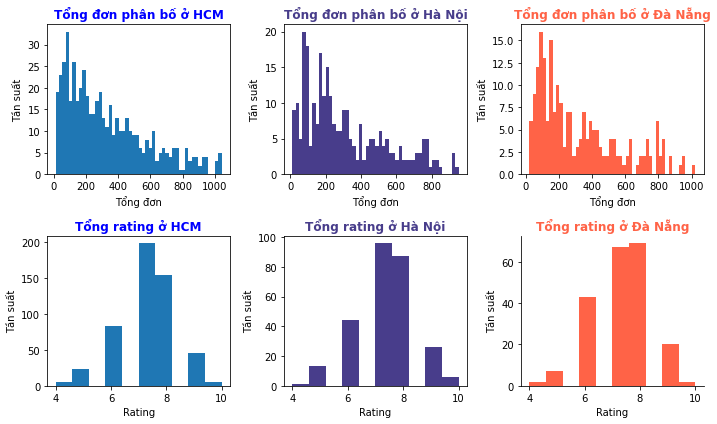

In [30]:
#bai 1b theo dia phuong----------------------------------------------------------------
fig=plt.figure()
ax1=fig.add_subplot(2,3,1)
ax1.hist(list_total_hcm,bins=50)
ax1.set_title("Tổng đơn phân bố ở HCM",color='b',weight='bold')
ax1.set_xlabel("Tổng đơn")
ax1.set_ylabel("Tần suất")

ax2=fig.add_subplot(2,3,2)
ax2.hist(list_total_hn,bins=50,color='darkslateblue')
ax2.set_title("Tổng đơn phân bố ở Hà Nội",color='darkslateblue',weight='bold')
ax2.set_xlabel("Tổng đơn")
ax2.set_ylabel("Tần suất")

ax3=fig.add_subplot(2,3,3)
ax3.hist(list_total_dn,bins=50,color='tomato')
ax3.set_title("Tổng đơn phân bố ở Đà Nẵng",color='tomato',weight='bold')
ax3.set_xlabel("Tổng đơn")
ax3.set_ylabel("Tần suất")

ax4=fig.add_subplot(2,3,4)
ax4.hist(list_rating_hcm,bins=10)
ax4.set_title("Tổng rating ở HCM",color='b',weight='bold')
ax4.set_xlabel("Rating")
ax4.set_ylabel("Tần suất")

ax5=fig.add_subplot(2,3,5)
ax5.hist(list_rating_hn,bins=10,color='darkslateblue')
ax5.set_title("Tổng rating ở Hà Nội",color='darkslateblue',weight='bold')
ax5.set_xlabel("Rating")
ax5.set_ylabel("Tần suất")

ax6=fig.add_subplot(2,3,6)
ax6.hist(list_rating_dn,bins=10,color='tomato')
ax6.set_title("Tổng rating ở Đà Nẵng",color='tomato',weight='bold')
ax6.set_xlabel("Rating")
ax6.set_ylabel("Tần suất")
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

figure = plt.gcf()
figure.set_size_inches(10, 6)
plt.tight_layout()
# plt.savefig("bai1b_theodiaphuong.png",dpi=150)
plt.show()


* => Người tiêu dùng ở ba thành phố thường chi khoảng 300 ngàn VNĐ trở lại
* => Thành phố Đà Nẵng khá hài lòng với sản phẩm của mình

### d.  Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

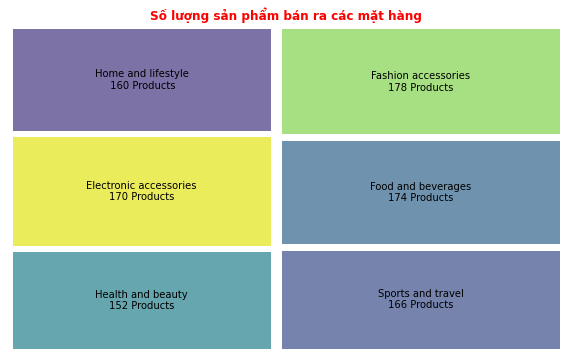

In [35]:
Quantity_Products=[Quantity_HaB,Quantity_E,Quantity_HaL,Quantity_SaT,Quantity_FaB,Quantity_F]
Labels_Products=[f"Health and beauty\n{Quantity_HaB} Products",f"Electronic accessories\n{Quantity_E} Products",
                f"Home and lifestyle\n {Quantity_HaL} Products",f"Sports and travel\n{Quantity_SaT} Products",
                 f"Food and beverages\n{Quantity_FaB} Products",f"Fashion accessories\n{Quantity_F} Products"]
# print(Labels_Products)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.set_title("Số lượng sản phẩm bán ra các mặt hàng",color='r',weight='bold')
squarify.plot(sizes=Quantity_Products, label=Labels_Products,
              pad=True,alpha=0.7)
plt.axis("off")
# plt.savefig("bai1_productline.png",dpi=150)
plt.show()

=> Số lượng đơn hàng thuộc các mặt hàng là tương đối đồng đều, tuy nhiên "Fashion Accessories" chiếm số lượng cao nhất